In [3]:
from tensorflow.keras.models import load_model
import os
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, auc
import matplotlib.pyplot as plt

In [19]:
model = load_model('ResNet.h5')

In [6]:
DATA_PATH = os.path.join('dataset')
actions = np.array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
sequence_length = 100
label_map = {label:num for num, label in enumerate(actions)}

In [7]:
sequences, labels = [], []

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    for sequence in np.array(os.listdir(action_path)).astype(int):
        frame_paths = [
            os.path.join(action_path, str(sequence), "{}.npy".format(frame_num))
            for frame_num in range(sequence_length)
        ]
        window = [np.load(frame_path) for frame_path in frame_paths]
        sequences.append(window)
        labels.append(label_map[action])

In [8]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [21]:
y_pred = model.predict(X_test)

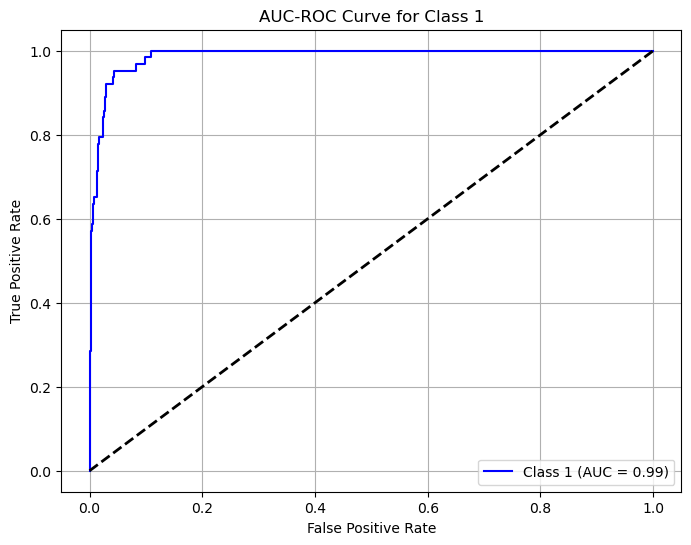

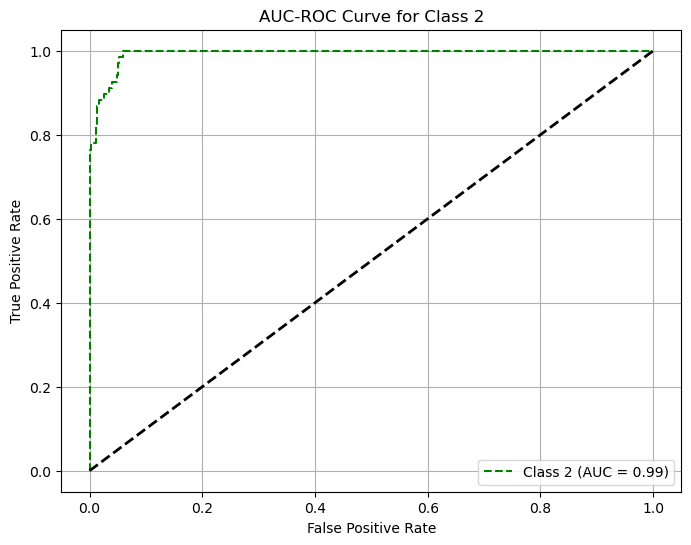

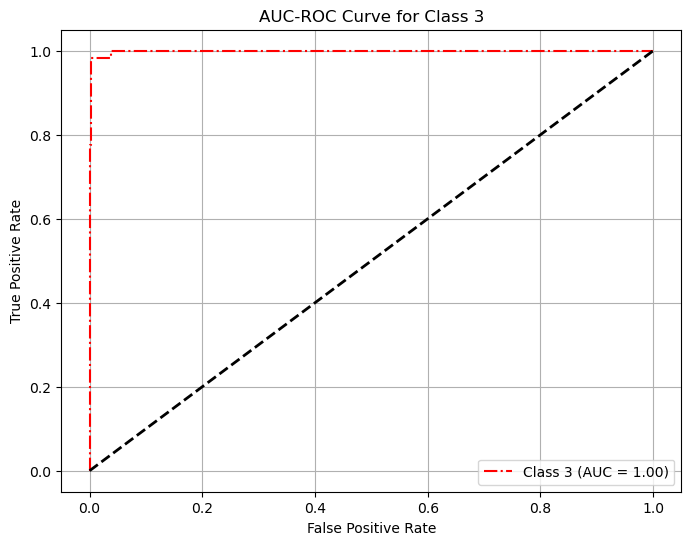

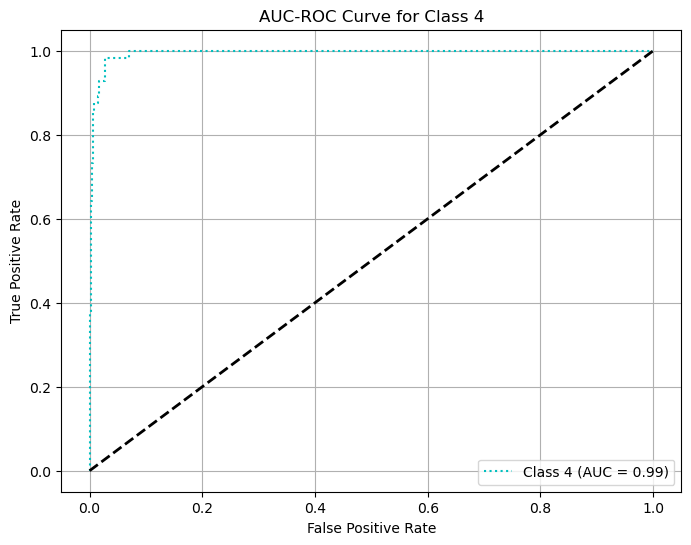

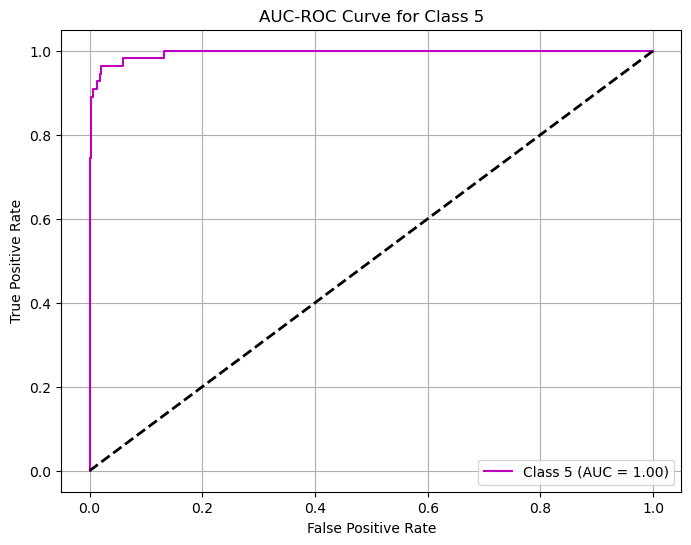

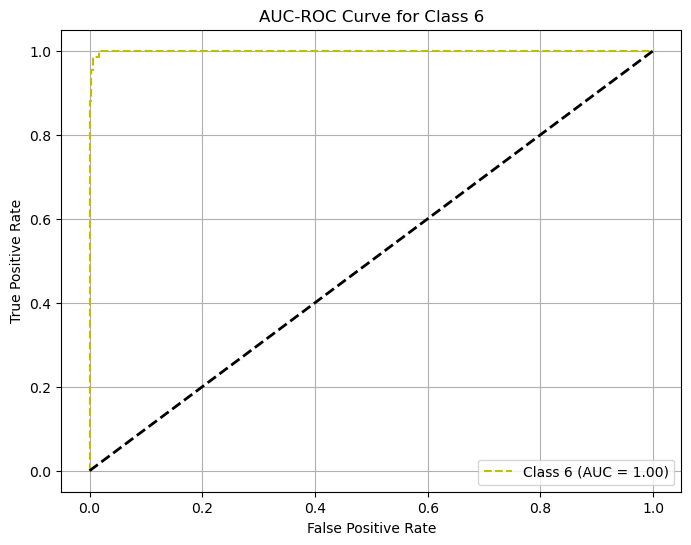

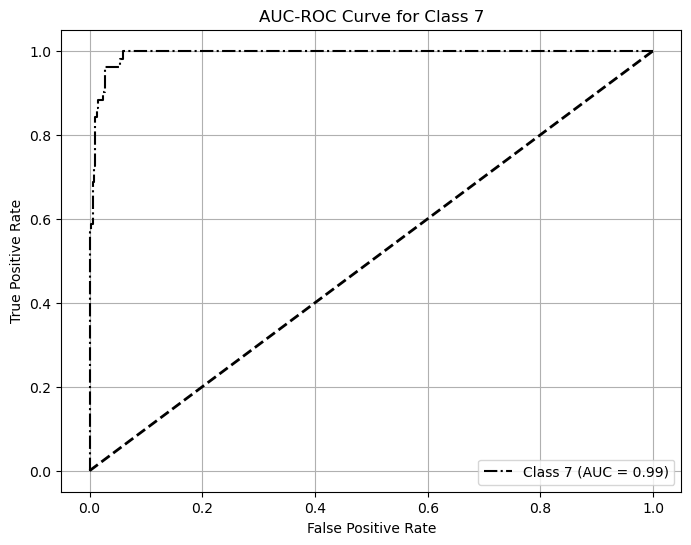

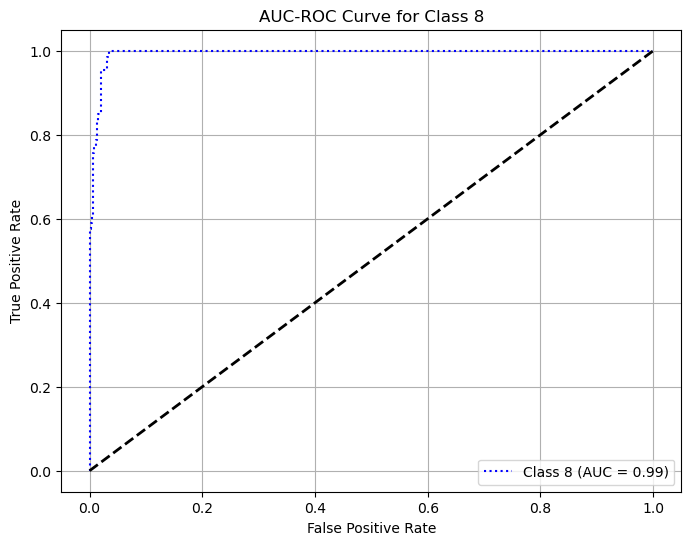

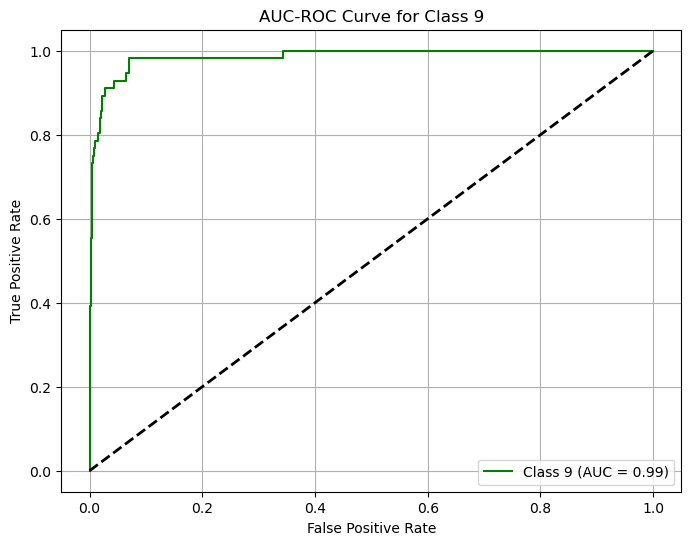

In [22]:
num_classes = y_test.shape[1]

line_styles = ['-', '--', '-.', ':']
line_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    
    style = line_styles[i % len(line_styles)]
    color = line_colors[i % len(line_colors)]
    
    plt.plot(fpr, tpr, label=f'Class {i+1} (AUC = {roc_auc:.2f})', linestyle=style, color=color)

    # Plot a diagonal line for reference
    plt.plot([0, 1], [0, 1], 'k--', lw=2)

    # Add labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'AUC-ROC Curve for Class {i+1}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

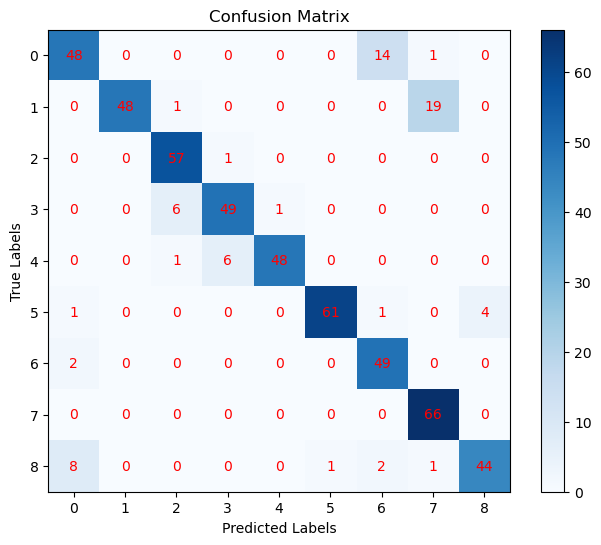

In [23]:
conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)

# Display numbers in the confusion matrix
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        plt.text(j, i, str(conf_mat[i, j]), ha='center', va='center', color='red')

plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()